In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import shapiro

In [158]:
data = pd.read_csv('sensor_readings_202504210526_luis_jimenez_25cm.csv')

In [159]:
print(data.head())

                    timestamp  distance_cm
0  2025-04-21T05:26:20.532918        26.32
1  2025-04-21T05:26:21.590757        35.55
2  2025-04-21T05:26:22.649653        29.38
3  2025-04-21T05:26:23.708302        29.84
4  2025-04-21T05:26:24.766792        35.63


Crea un histograma con los datos de las distancias

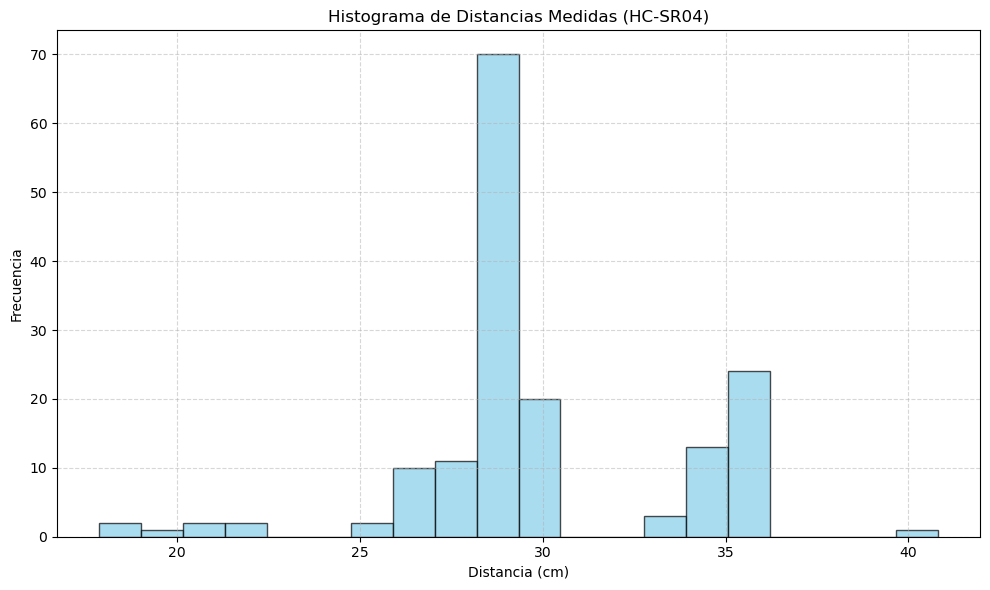

In [161]:
# Extraer las distancias
distances = data["distance_cm"]

# Crear histograma
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=20, edgecolor='black', alpha=0.7, color='skyblue', density=False)

plt.title("Histograma de Distancias Medidas (HC-SR04)")
plt.xlabel("Distancia (cm)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

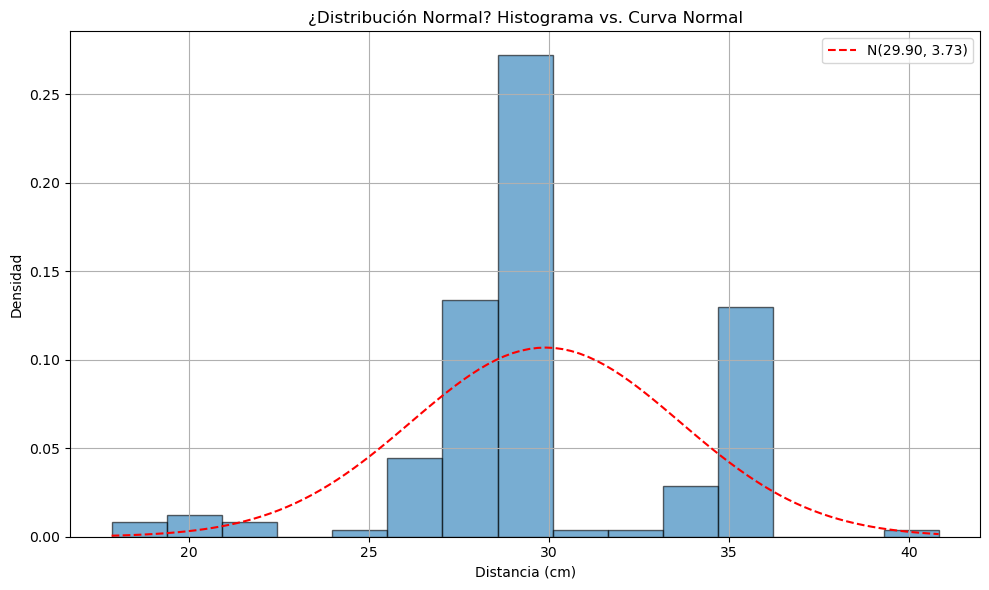

In [162]:
plt.figure(figsize=(10, 6))

# Calculamos media y desviación estándar
mean = distances.mean()
std = distances.std()

# Histograma normalizado (density=True)
count, bins, ignored = plt.hist(distances, bins=15, density=True, alpha=0.6, edgecolor='black')

# Curva normal ajustada
x = np.linspace(min(distances), max(distances), 100)
plt.plot(x, norm.pdf(x, mean, std), 'r--', label=f'N({mean:.2f}, {std:.2f})')

plt.title("¿Distribución Normal? Histograma vs. Curva Normal")
plt.xlabel("Distancia (cm)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Gráfica Q-Q (Quantile-Quantile): Muestra si los cuantiles de tus datos se alinean con los de una distribución normal. Si los puntos siguen la línea recta central tus datos se distribuyen normalmente.

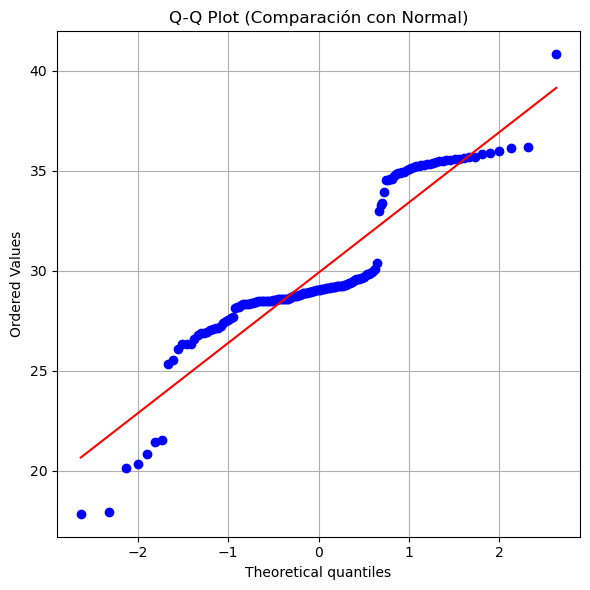

In [164]:
# Gráfica Q-Q (Quantile-Quantile)
plt.figure(figsize=(6, 6))
stats.probplot(distances, dist="norm", plot=plt)
plt.title("Q-Q Plot (Comparación con Normal)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [165]:
# Cálculo de estadísticas
mean = distances.mean()  # Media
std = distances.std()    # Desviación estándar
sem = stats.sem(distances)  # Error estándar de la media 

print(f"Media (μ): {mean:.2f} cm")
print(f"Desviación estándar (σ): {std:.2f} cm")
print(f"Incertidumbre estándar (SEM): {sem:.2f} cm")

Media (μ): 29.90 cm
Desviación estándar (σ): 3.73 cm
Incertidumbre estándar (SEM): 0.29 cm


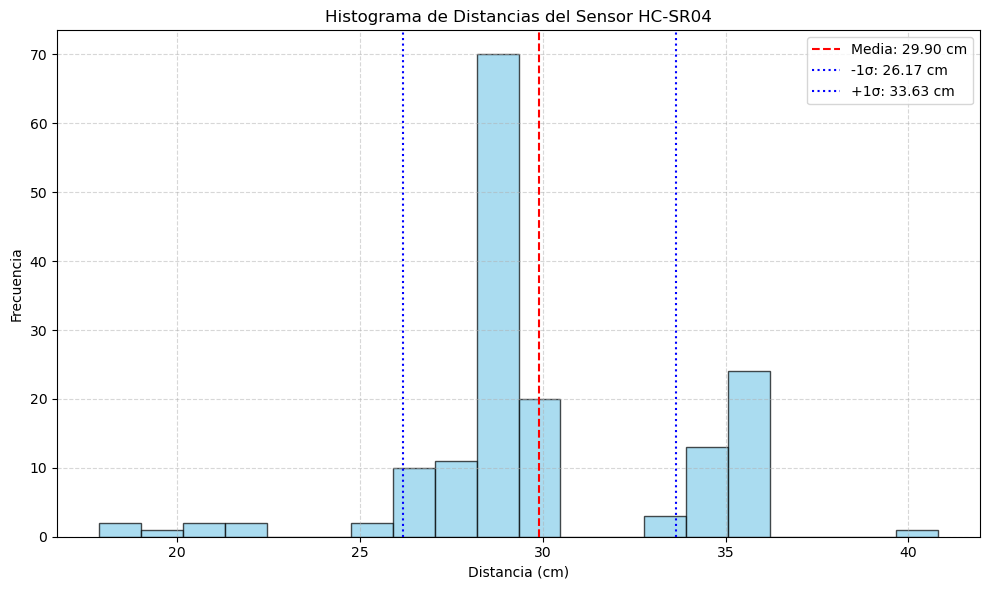

In [166]:
# Gráfico de histograma con estadísticas
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=20, edgecolor='black', alpha=0.7, color='skyblue', density=False)

# Líneas de referencia estadísticas
plt.axvline(mean, color='red', linestyle='--', label=f'Media: {mean:.2f} cm')
plt.axvline(mean - std, color='blue', linestyle=':', label=f'-1σ: {mean - std:.2f} cm')
plt.axvline(mean + std, color='blue', linestyle=':', label=f'+1σ: {mean + std:.2f} cm')

# Estilo del gráfico
plt.title("Histograma de Distancias del Sensor HC-SR04")
plt.xlabel("Distancia (cm)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Calculo del error

In [168]:
# Valor real de la distancia medida 
true_distance = 25.0  # cm 

# Cálculo de errores
errors = distances - true_distance  # Error para cada medición
mae = np.mean(np.abs(errors))  # Error Medio Absoluto (MAE)
std = np.std(distances, ddof=1)  # Desviación estándar (con ddof=1 para muestra)

# Resultados
print(f"\nAnálisis de Error:")
print(f"Distancia real: {true_distance} cm")
print(f"Error medio absoluto (MAE): {mae:.3f} cm")
print(f"Desviación estándar: {std:.3f} cm")


Análisis de Error:
Distancia real: 25.0 cm
Error medio absoluto (MAE): 5.333 cm
Desviación estándar: 3.733 cm


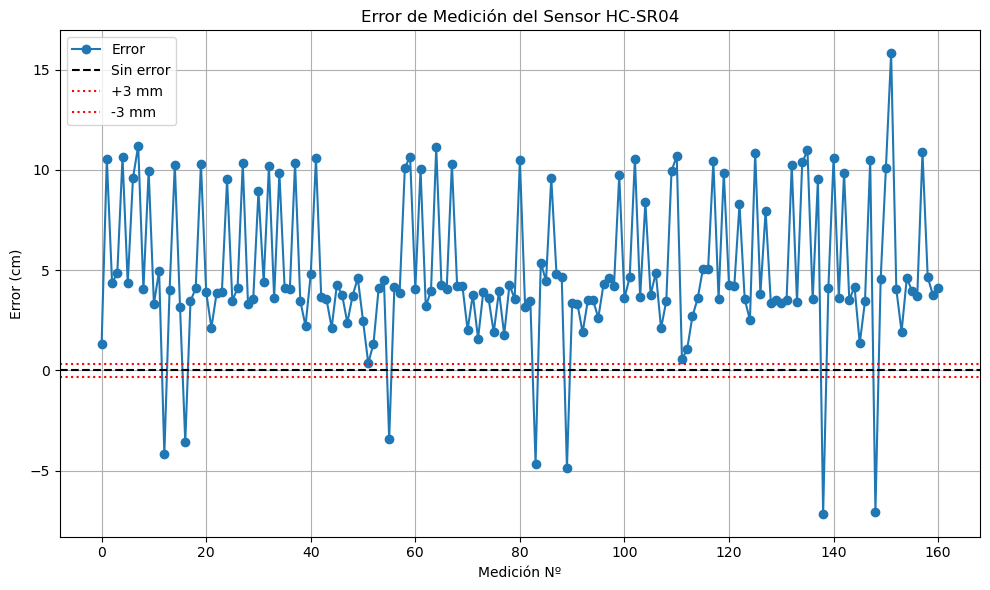

In [169]:
plt.figure(figsize=(10, 6))
plt.plot(errors.values, marker='o', linestyle='-', label="Error")
plt.axhline(0, color='black', linestyle='--', label="Sin error")
plt.axhline(0.3, color='red', linestyle=':', label="+3 mm")
plt.axhline(-0.3, color='red', linestyle=':', label="-3 mm")

plt.title("Error de Medición del Sensor HC-SR04")
plt.xlabel("Medición Nº")
plt.ylabel("Error (cm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\luise\AppData\Local\Temp\ipykernel_13984\1917196260.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


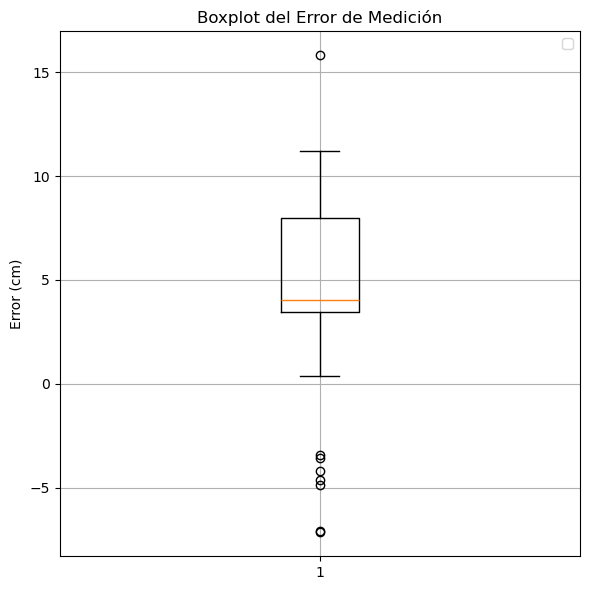

In [170]:
plt.figure(figsize=(6, 6))
plt.boxplot(errors, vert=True)

plt.title("Boxplot del Error de Medición")
plt.ylabel("Error (cm)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Intervalo de la muestra: 
ME=z*\sigma/ \sqrt{n}
ME es el margen de error.
z es el valor crítico (por ejemplo, 1.96 para un 95% de confianza).
σ es la desviación estándar muestral.
n es el tamaño de la muestra.

In [172]:
# Tamaño de la muestra
n = len(distances)  # Número de mediciones

# Z-score para 95% de confianza (2 colas)
z = norm.ppf(0.975)  # 1.96

# Margen de error (ME = z * σ/√n)
me = z * (std / np.sqrt(n))

# Intervalo de confianza (media ± margen de error)
ci_lower = mean - me
ci_upper = mean + me

# Resultados
print("\n--- Intervalo de Confianza al 95% ---")
print(f"Media: {mean:.2f} cm")
print(f"Desviación estándar (σ): {std:.2f} cm")
print(f"Tamaño de muestra (n): {n}")
print(f"Margen de error (95%): ±{me:.2f} cm")
print(f"Intervalo de confianza: [{ci_lower:.2f} cm, {ci_upper:.2f} cm]")


--- Intervalo de Confianza al 95% ---
Media: 29.90 cm
Desviación estándar (σ): 3.73 cm
Tamaño de muestra (n): 161
Margen de error (95%): ±0.58 cm
Intervalo de confianza: [29.32 cm, 30.48 cm]
